#### Data Story

You are working as a data scientist for a regional real estate agency that specializes in residential housing sales. The agency operates across several neighborhoods and is trying to better understand the factors that drive home prices.

Real estate agents have long believed that:

- Bigger houses are worth more, but the increase in value slows down after a certain size (nonlinear effects).

- Neighborhood reputation and house style play an important role beyond physical size.

- Older homes may lose value unless they are of high quality or well-maintained.

The agency has collected data on 500 recent home sales, including information on house size, year built, quality ratings, lot size, garage capacity, neighborhood, and house style. The dataset also contains the sale price, which will serve as the target variable

#### Task

To build predictive models that capture both linear and nonlinear effects of housing characteristics on sale prices while balancing model accuracy and interpretability.

In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset

df = pd.read_csv("real_estate.csv")

df

,SalePrice,GrLivArea,YearBuilt,OverallQual,LotArea,GarageCars,Neighborhood,HouseStyle
0,18890778.14,1963.088774,1943,9,10734.639410,2,NAmes,2Story
1,15614193.46,2454.708320,1948,1,8742.911199,3,NAmes,2Story
2,19766057.31,800.716213,2003,7,11273.040420,0,Somerst,1Story
3,25701994.22,1781.484618,1974,8,12570.078710,3,NAmes,1Story
4,15171423.35,1174.678715,1960,3,9249.763860,2,Edwards,2Story
...,...,...,...,...,...,...,...,...
495,19131432.08,1359.449854,1984,3,8924.570833,0,Edwards,1.5Fin
496,11923196.42,2398.843263,1917,5,8817.416300,2,Edwards,SLvl
497,15372159.13,1820.421431,1966,5,11779.296420,1,NAmes,1.5Fin
498,12515578.55,1214.410505,1941,4,9720.315592,0,NAmes,2Story


In [85]:
# Quick look

print(df.head())

     SalePrice    GrLivArea  YearBuilt  OverallQual       LotArea  GarageCars  \
0  18890778.14  1963.088774       1943            9  10734.639410           2   
1  15614193.46  2454.708320       1948            1   8742.911199           3   
2  19766057.31   800.716213       2003            7  11273.040420           0   
3  25701994.22  1781.484618       1974            8  12570.078710           3   
4  15171423.35  1174.678715       1960            3   9249.763860           2   

  Neighborhood HouseStyle  
0        NAmes     2Story  
1        NAmes     2Story  
2      Somerst     1Story  
3        NAmes     1Story  
4      Edwards     2Story  


In [86]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     500 non-null    float64
 1   GrLivArea     500 non-null    float64
 2   YearBuilt     500 non-null    int64  
 3   OverallQual   500 non-null    int64  
 4   LotArea       500 non-null    float64
 5   GarageCars    500 non-null    int64  
 6   Neighborhood  500 non-null    object 
 7   HouseStyle    500 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 31.4+ KB
None


In [87]:
print(df.describe())

          SalePrice    GrLivArea    YearBuilt  OverallQual       LotArea  \
count  5.000000e+02   500.000000   500.000000   500.000000    500.000000   
mean   1.704409e+07  1518.801559  1952.512000     5.376000   9130.646099   
std    5.310883e+06   482.207110    31.471555     2.783904   2558.106416   
min    6.155090e+06   500.000000  1900.000000     1.000000   2101.006502   
25%    1.319143e+07  1202.354130  1925.000000     3.000000   7438.291983   
50%    1.633808e+07  1514.265799  1950.000000     5.000000   9073.058700   
75%    1.970152e+07  1825.621149  1978.000000     8.000000  10957.180360   
max    5.170110e+07  2816.191032  2009.000000    10.000000  17136.618230   

       GarageCars  
count  500.000000  
mean     1.488000  
std      1.147384  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      3.000000  
max      3.000000  


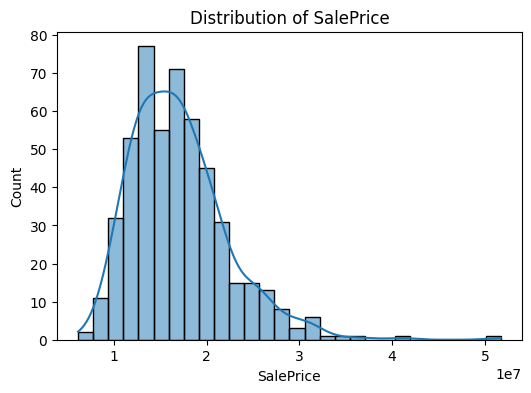

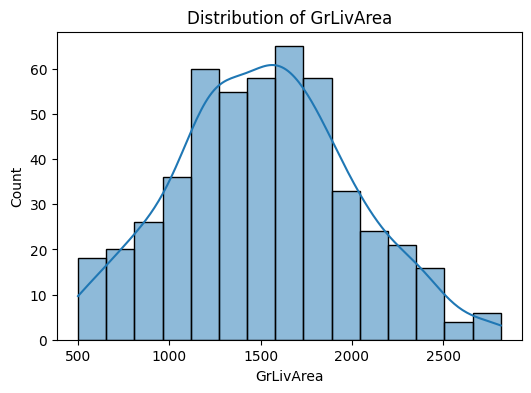

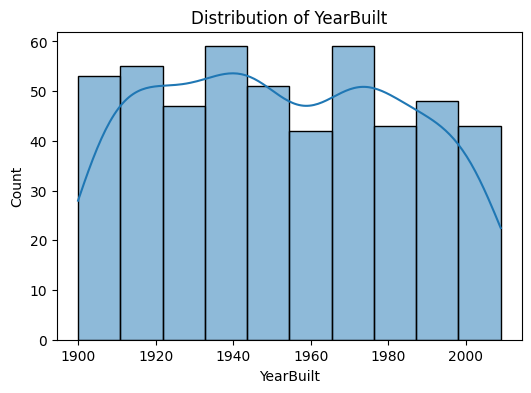

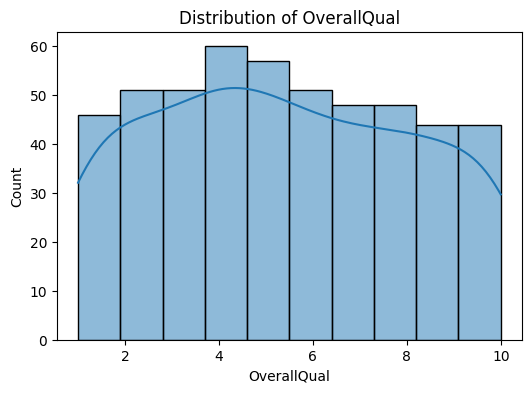

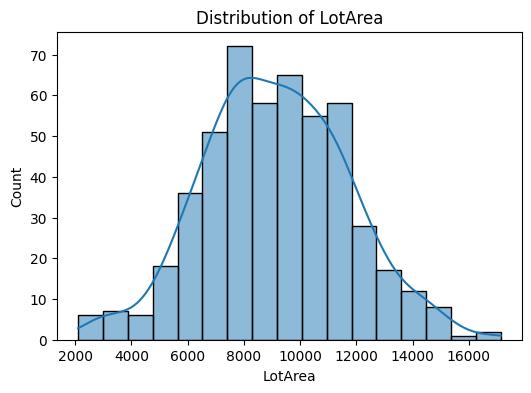

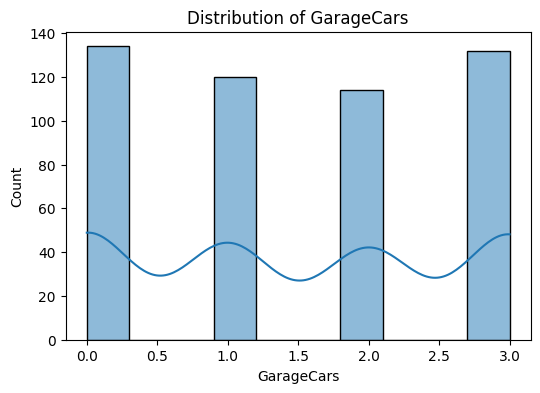

In [88]:
# univariate analysis

# numeric features

num_cols = ['SalePrice', 'GrLivArea', 'YearBuilt', 'OverallQual', 'LotArea', 'GarageCars']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

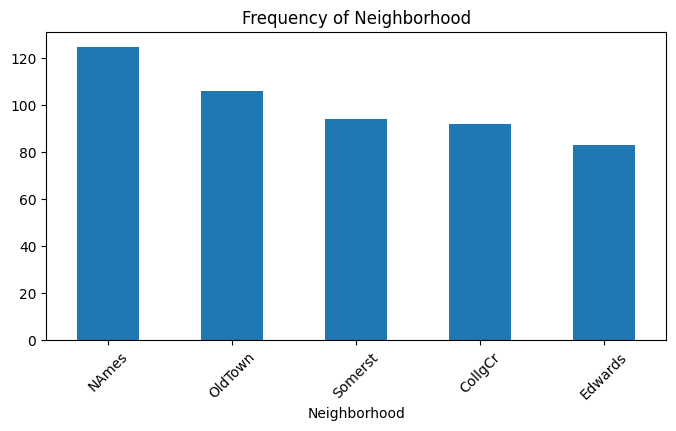

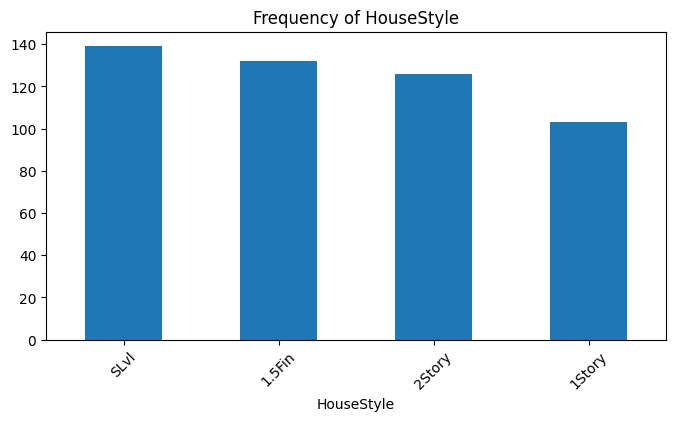

In [89]:
# categorical features

cat_cols = ['Neighborhood', 'HouseStyle']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


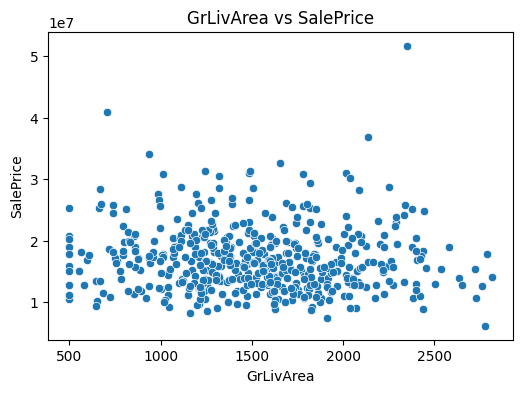

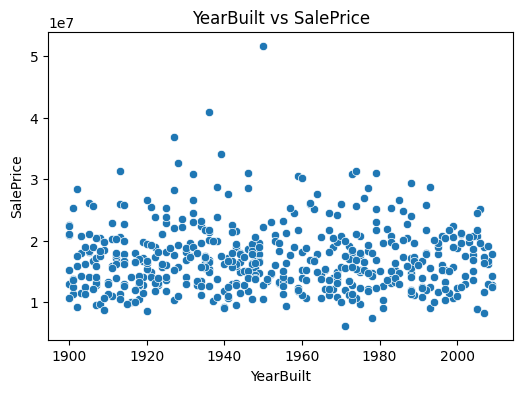

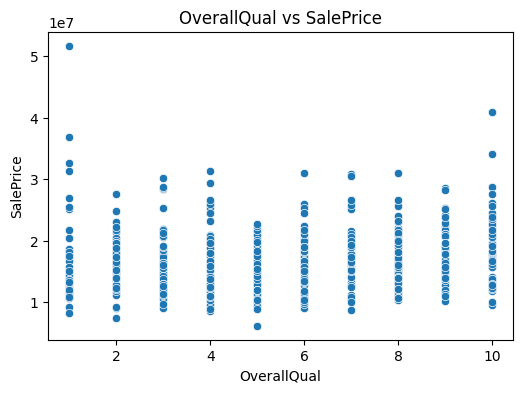

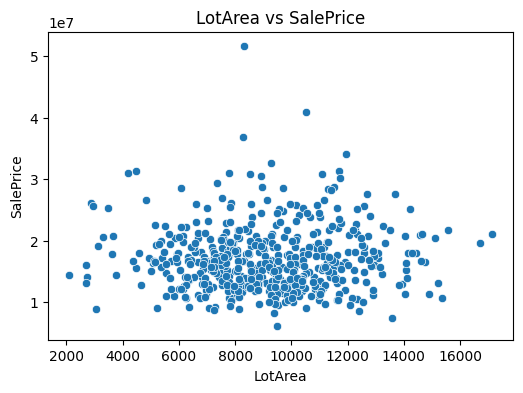

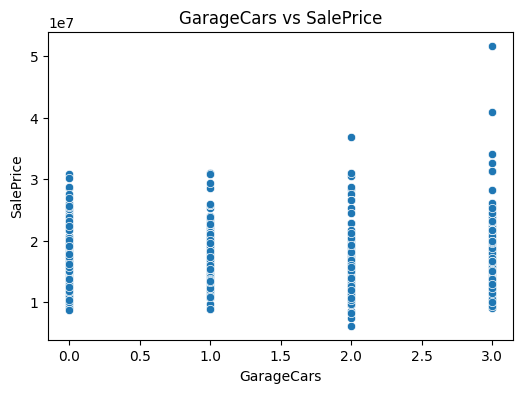

In [90]:
# Bivariate Analysis

# Scatter plots for numerical features
for col in ['GrLivArea', 'YearBuilt', 'OverallQual', 'LotArea', 'GarageCars']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.show()


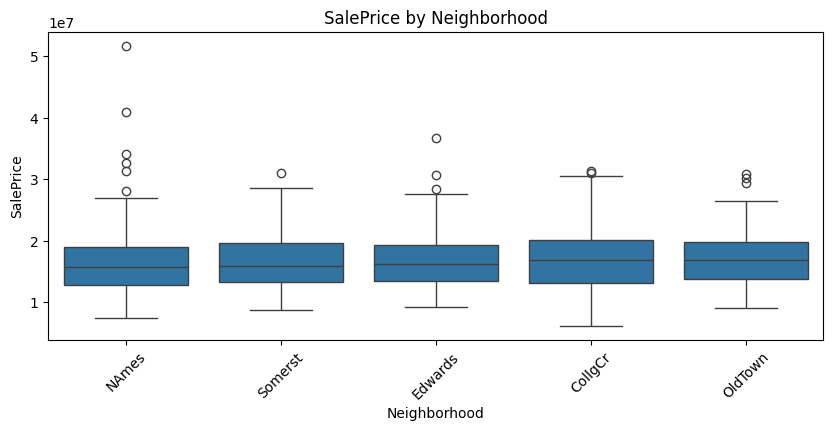

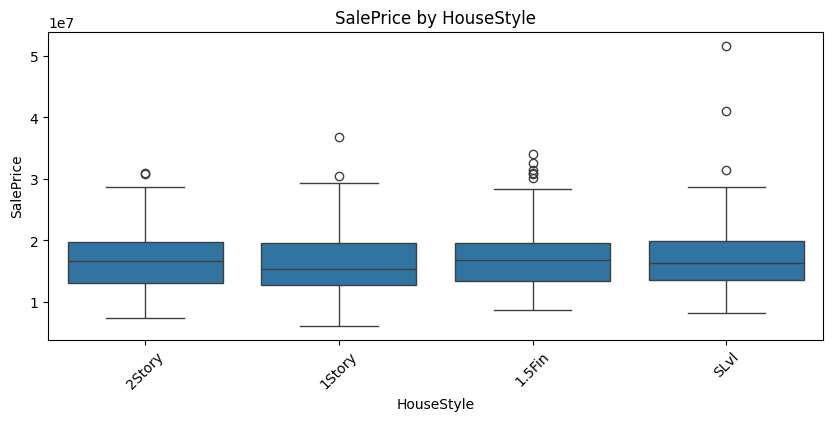

In [91]:
# Box plots for categorical features

for col in ['Neighborhood', 'HouseStyle']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
    plt.show()

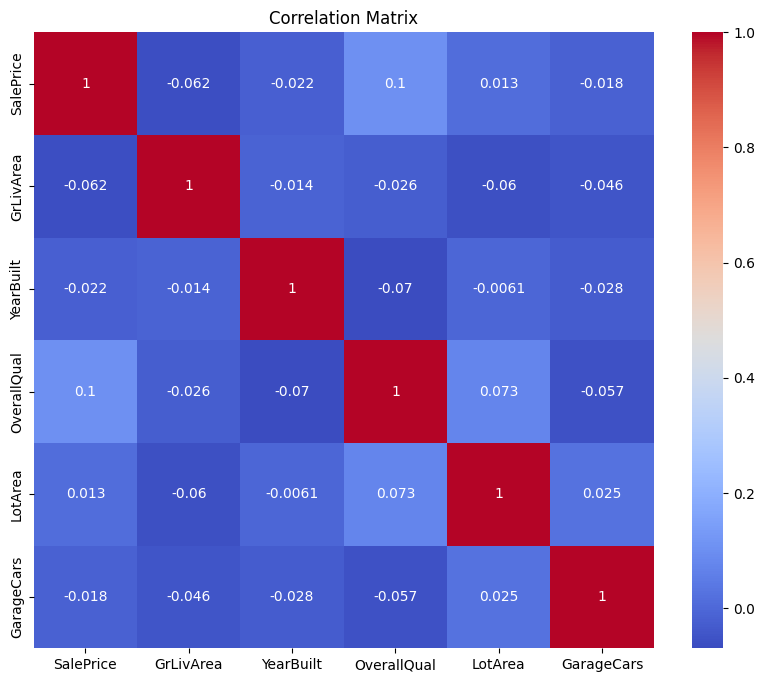

In [92]:
# Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [93]:
# Missing Values

missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:\n", missing)

Missing values:
 Series([], dtype: int64)


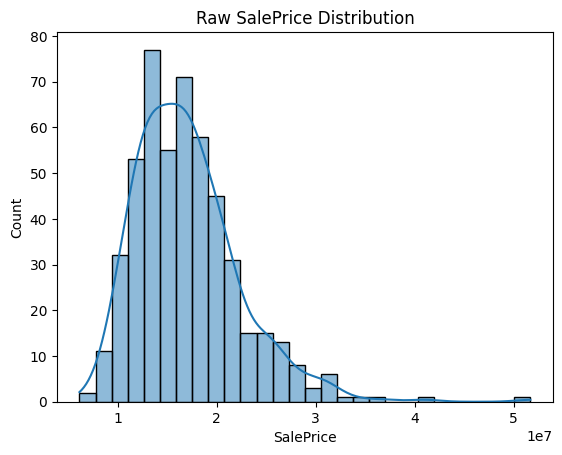

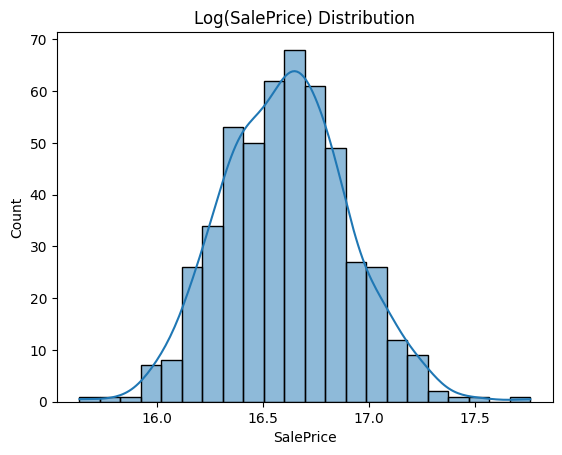

In [96]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Raw SalePrice Distribution")
plt.show()

sns.histplot(np.log(df['SalePrice']), kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [94]:
# Data Cleaning

df.dropna(inplace=True)  # Drop rows with missing values

df['Age'] = 2025 - df['YearBuilt']  # Feature engineering
df['LogPrice'] = np.log(df['SalePrice'])  # Log-transform target

df.head()

,SalePrice,GrLivArea,YearBuilt,OverallQual,LotArea,GarageCars,Neighborhood,HouseStyle,Age,LogPrice
0,18890778.14,1963.088774,1943,9,10734.639410,2,NAmes,2Story,82,16.754184
1,15614193.46,2454.708320,1948,1,8742.911199,3,NAmes,2Story,77,16.563691
2,19766057.31,800.716213,2003,7,11273.040420,0,Somerst,1Story,22,16.799477
3,25701994.22,1781.484618,1974,8,12570.078710,3,NAmes,1Story,51,17.062079
4,15171423.35,1174.678715,1960,3,9249.763860,2,Edwards,2Story,65,16.534924


In [53]:
# Categorical encoding

df_encoded = pd.get_dummies(df, columns=['Neighborhood', 'HouseStyle'], drop_first=True)
df_encoded

,SalePrice,GrLivArea,YearBuilt,OverallQual,LotArea,GarageCars,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Somerst,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl
0,18890778.14,1963.088774,1943,9,10734.639410,2,False,True,False,False,False,True,False
1,15614193.46,2454.708320,1948,1,8742.911199,3,False,True,False,False,False,True,False
2,19766057.31,800.716213,2003,7,11273.040420,0,False,False,False,True,True,False,False
3,25701994.22,1781.484618,1974,8,12570.078710,3,False,True,False,False,True,False,False
4,15171423.35,1174.678715,1960,3,9249.763860,2,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19131432.08,1359.449854,1984,3,8924.570833,0,True,False,False,False,False,False,False
496,11923196.42,2398.843263,1917,5,8817.416300,2,True,False,False,False,False,False,True
497,15372159.13,1820.421431,1966,5,11779.296420,1,False,True,False,False,False,False,False
498,12515578.55,1214.410505,1941,4,9720.315592,0,False,True,False,False,False,True,False


#### Mission

As the lead data scientist, you and your team will design and justify your own modeling approach.

Your work should highlight both predictive performance and clear communication of insights for the real estate agency.

In [154]:
# Model 0

# importing model libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [155]:
# Select numeric features only

X = df_encoded.drop(columns=['SalePrice', 'LogPrice','Age'])
X = sm.add_constant(X)  # Add intercept

# Ensure target is numeric
y = df_encoded['LogPrice']

In [156]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
# Ensure numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [158]:
# Drop rows with NaNs
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [159]:
# Fit model
model0 = LinearRegression(fit_intercept=False)
model0.fit(X_train, y_train)

# Predict on training set
y_pred_train = model0.predict(X_train)
residuals = y_train - y_pred_train

In [160]:
# Evaluate

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

RMSE: 0.29
R²: 0.019


In [161]:
# Compute MSE
n, p = X_train.shape

mse = np.mean(residuals**2)

# Compute XtX inverse
XtX = X_train.astype(float).to_numpy().T @ X_train.astype(float).to_numpy()
XtX_inv = np.linalg.inv(XtX)

# Standard errors
se = np.sqrt(np.diagonal(mse * XtX_inv))

In [162]:
# Compute t-stats and p-values
t_stats = model0.coef_ / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

In [163]:
# Build summary table
summary_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model0.coef_,
    'Std Error': se,
    't-stat': t_stats,
    'p-value': p_values
}).sort_values(by='p-value')

In [164]:
# Print full summary
print(f"Intercept: {model0.intercept_:.4f}")
print(f"R² (Train): {r2_score(y_train, y_pred_train):.4f}")
print(f"RMSE (Train): {np.sqrt(mse):.4f}")
print("\nRegression Summary:")
print(summary_df.to_string(index=False))

Intercept: 0.0000
R² (Train): 0.0271
RMSE (Train): 0.2901

Regression Summary:
             Feature   Coefficient  Std Error    t-stat  p-value
               const  1.597645e+01   0.916928 17.423896 0.000000
         OverallQual  1.422601e-02   0.005173  2.749996 0.006240
           GrLivArea -3.666356e-05   0.000031 -1.177192 0.239844
          GarageCars -8.936670e-03   0.012658 -0.706014 0.480605
           YearBuilt  3.191148e-04   0.000465  0.685871 0.493206
   HouseStyle_1Story -2.070448e-02   0.043052 -0.480918 0.630847
Neighborhood_OldTown  1.645149e-02   0.047728  0.344691 0.730515
     HouseStyle_SLvl  1.257274e-02   0.040015  0.314202 0.753537
  Neighborhood_NAmes -6.831129e-03   0.045238 -0.151004 0.880052
   HouseStyle_2Story  5.913076e-03   0.040030  0.147717 0.882643
             LotArea -4.868474e-07   0.000006 -0.086099 0.931433
Neighborhood_Edwards  2.653025e-03   0.049541  0.053552 0.957320
Neighborhood_Somerst  1.910526e-03   0.048574  0.039333 0.968646


### Interpretating Results


1. Model Overview :

- Intercept: 15.9765
  - The LogPrice of 15.9765 when all features are zero ~ $8,000,000 which is clearly not realistic

- R² (Train): 0.0271
  - The model explains about 2.7% of the variance in log-transformed sale prices — a very modest fit.

- RMSE (Train): 0.2901
  - Average prediction error in log price units

2. Features :

- OverallQual → p-value = 0.0062 → Significant
  - Higher quality homes are associated with higher prices.

- GrLivArea	→ p-value = 0.24 → Not Significant
  - Size of living area shows weak, non-significant effect here

- GarageCars → p-value = 0.48 → Not Significant
  - Number of garage cars not significantly impacting price

- YearBuilt → p-value = 0.49 → Not Significant
  - Year built is not statistically significant in this model

- HouseStyle and Neighborhood categories
  - No strong evidence these categorical variables impact price here

Overall :

- The strongest and only statistically significant predictor is OverallQual, highlighting that home quality drives price more than size, age, or neighborhood in this model.

- Many variables, including important housing attributes and categorical dummies, show no significant effect, which together with low R² suggests the model may need refinement — possibly nonlinear terms, interactions, or alternative modeling techniques.

:: Next step is to do partial regression plots, polynomial regression and spline regression ::


### Regression Plots

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid

In [8]:
model_r = smf.ols(formula='SalePrice~GrLivArea+YearBuilt+OverallQual+LotArea+GarageCars+Neighborhood+HouseStyle',data=df).fit()

print(model_r.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8710
Date:                Sun, 05 Oct 2025   Prob (F-statistic):              0.577
Time:                        18:42:12   Log-Likelihood:                -8446.3
No. Observations:                 500   AIC:                         1.692e+04
Df Residuals:                     487   BIC:                         1.697e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

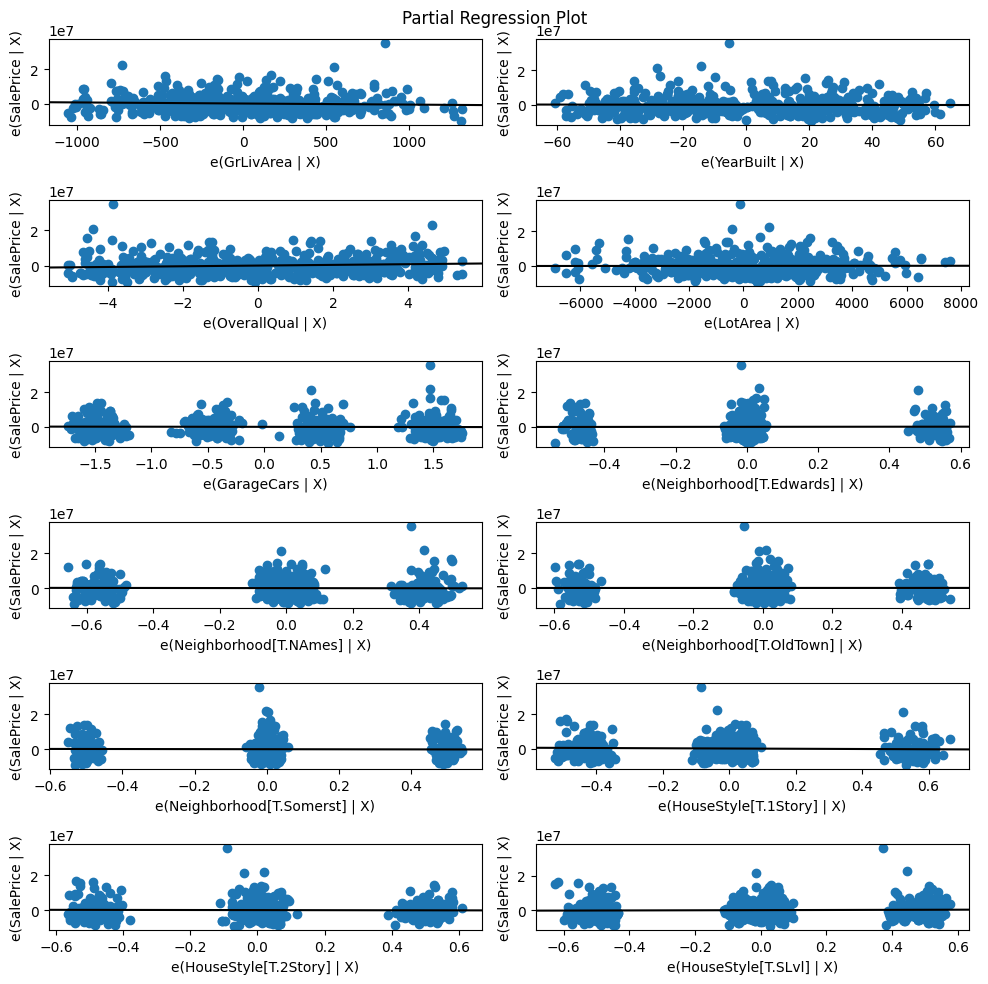

In [10]:
include = ["GrLivArea","YearBuilt","OverallQual","LotArea","GarageCars",
           "Neighborhood[T.Edwards]","Neighborhood[T.NAmes]","Neighborhood[T.OldTown]","Neighborhood[T.Somerst]",
           "HouseStyle[T.1Story]","HouseStyle[T.2Story]","HouseStyle[T.SLvl]"]

graph=plt.figure(figsize=(10,10))
plot_partregress_grid(model_r, fig=graph,exog_idx=include)
plt.show()

In [11]:
model_r_1 = smf.ols("SalePrice ~ GrLivArea + YearBuilt + OverallQual + LotArea + GarageCars + \
                 C(Neighborhood) + C(HouseStyle)", data=df).fit()


In [22]:
base_formula = "SalePrice ~ GrLivArea + YearBuilt + OverallQual + LotArea + GarageCars + C(Neighborhood) + C(HouseStyle)"
predictors = ['GrLivArea', 'YearBuilt', 'OverallQual', 'LotArea', 'GarageCars', 'C(Neighborhood)', 'C(HouseStyle)']


In [25]:
partial_r2 = {}

for var in predictors:
    reduced_formula = "SalePrice ~ " + " + ".join([v for v in predictors if v != var])
    reduced_model = smf.ols(reduced_formula, data=df).fit()
    partial_r2[var] = model_r.rsquared - reduced_model.rsquared

pd.Series(partial_r2).sort_values(ascending=False)


,0
OverallQual,0.010434
C(HouseStyle),0.005771
GrLivArea,0.003216
C(Neighborhood),0.000736
GarageCars,0.000205
YearBuilt,0.000139
LotArea,0.000013


#### Partial R^2 interpretation :


- OverallQual	→ 0.0104 → Most influential — explains ~1% of variance alone

- C(HouseStyle)	→ 0.0058 → Moderate impact — house style matters, but less than quality

- GrLivArea	0.0032 →	Small effect — size contributes, but not strongly in this setup

- C(Neighborhood) →	0.0007 →	Minimal — neighborhood dummies add very little explanatory power

- GarageCars → 0.0002 →	Negligible — garage capacity has weak independent effect

- YearBuilt	→ 0.0001 → Almost no contribution — likely collinear with other age-related features.

- LotArea →	0.00001 →	Statistically irrelevant — lot size doesn’t help explain price here.


### Polynomial Regression

In [42]:
# assign the predictors and target variable

X = df[["GrLivArea"]]
y = df["SalePrice"]

In [43]:
# importing libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, StandardScaler
from sklearn.linear_model import LinearRegression

In [44]:
# generating models

ols_model = Pipeline([
    ("linreg", LinearRegression())
])

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

spline_model = Pipeline([
    ("spline", SplineTransformer(degree=3, n_knots=8, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])


In [45]:
# train / test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Linear": ols_model,
    "Polynomial (deg=3)": poly_model,
    "Spline (knots=8)": spline_model
}

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5


In [46]:
# Outcome / Evaluation

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    yhat_tr = model.predict(X_train)
    yhat_te = model.predict(X_test)

    results.append({
        "Model": name,
        "Train RMSE": rmse(y_train, yhat_tr),
        "Test RMSE": rmse(y_test, yhat_te),
        "Train R²": r2_score(y_train, yhat_tr),
        "Test R²": r2_score(y_test, yhat_te)
    })

pd.DataFrame(results).sort_values("Test RMSE").round(4)

,Model,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear,5.224079e+06,5.462550e+06,0.0015,0.0069
1,Polynomial (deg=3),5.217527e+06,5.522121e+06,0.0040,-0.0148
2,Spline (knots=8),5.120007e+06,5.591622e+06,0.0409,-0.0405


In [47]:
# visualtion

grid = pd.DataFrame({"GrLivArea": np.linspace(X["GrLivArea"].min(), X["GrLivArea"].max(), 200)})

grid["Linear"] = ols_model.fit(X, y).predict(grid[["GrLivArea"]])
grid["Polynomial"] = poly_model.fit(X, y).predict(grid[["GrLivArea"]])
grid["Spline"] = spline_model.fit(X, y).predict(grid[["GrLivArea"]])

grid

,GrLivArea,Linear,Polynomial,Spline
0,500.000000,1.774252e+07,1.830463e+07,1.640102e+07
1,511.639151,1.773454e+07,1.827272e+07,1.665708e+07
2,523.278302,1.772656e+07,1.824132e+07,1.689295e+07
3,534.917453,1.771858e+07,1.821044e+07,1.710933e+07
4,546.556604,1.771060e+07,1.818006e+07,1.730692e+07
...,...,...,...,...
195,2769.634428,1.618660e+07,1.610416e+07,1.248055e+07
196,2781.273579,1.617862e+07,1.608351e+07,1.279072e+07
197,2792.912730,1.617065e+07,1.606245e+07,1.317674e+07
198,2804.551881,1.616267e+07,1.604099e+07,1.364266e+07


In [48]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=X["GrLivArea"], y=y, mode="markers", name="Actual"))
fig.add_trace(go.Scatter(x=grid["GrLivArea"], y=grid["Linear"], mode="lines", name="Linear"))
fig.add_trace(go.Scatter(x=grid["GrLivArea"], y=grid["Polynomial"], mode="lines", name="Polynomial"))
fig.add_trace(go.Scatter(x=grid["GrLivArea"], y=grid["Spline"], mode="lines", name="Spline"))
fig.show()

### Interpretation :

- "GrLivArea" has a nonlinear relationship with SalePrice

- Spline regression offers the best balance of flexibility and interpretability.


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [62]:
X = df[["GrLivArea", "OverallQual", "GarageCars", "YearBuilt", "LotArea", "Neighborhood", "HouseStyle"]]
y = df["SalePrice"]

In [74]:
## Using all variables

# Define feature groups
numeric_features = ["GrLivArea", "OverallQual", "GarageCars", "YearBuilt", "LotArea"]
categorical_features = ["Neighborhood", "HouseStyle"]

# Polynomial pipeline
poly_preprocessor = ColumnTransformer([
    ("poly", PolynomialFeatures(degree=2, include_bias=False), numeric_features),
    ("onehot", OneHotEncoder(drop="first"), categorical_features)
])

poly_model = Pipeline([
    ("preprocess", poly_preprocessor),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Fit the model
poly_model.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['GrLivArea', 'OverallQual',
                                                   'GarageCars', 'YearBuilt',
                                                   'LotArea']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Neighborhood',
                                                   'HouseStyle'])])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer

spline_preprocessor = ColumnTransformer([
    ("spline", SplineTransformer(degree=3, n_knots=5), numeric_features),
    ("onehot", OneHotEncoder(drop="first"), categorical_features)
])

spline_model = Pipeline([
    ("preprocess", spline_preprocessor),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

spline_pipeline = Pipeline([
    ("features", ColumnTransformer([
        ("spline", SplineTransformer(degree=3, n_knots=5), ["GrLivArea", "YearBuilt"]),
        ("pass", "passthrough", ["OverallQual", "GarageCars"])
    ])),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

spline_pipeline.fit(X, y)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('spline', SplineTransformer(),
                                                  ['GrLivArea', 'YearBuilt']),
                                                 ('pass', 'passthrough',
                                                  ['OverallQual',
                                                   'GarageCars'])])),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [77]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

models = {
    "Polynomial Regression": poly_model,
    "Spline Regression": spline_model
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    yhat_tr = model.predict(X_train)
    yhat_te = model.predict(X_test)

    results.append({
        "Model": name,
        "Train RMSE": rmse(y_train, yhat_tr),
        "Test RMSE": rmse(y_test, yhat_te),
        "Train R²": r2_score(y_train, yhat_tr),
        "Test R²": r2_score(y_test, yhat_te)
    })

pd.DataFrame(results).sort_values("Test RMSE").round(4)


,Model,Train RMSE,Test RMSE,Train R²,Test R²
0,Polynomial Regression,5.051808e+06,5.587261e+06,0.0662,-0.0389
1,Spline Regression,5.009942e+06,5.671439e+06,0.0817,-0.0705


In [80]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode="lines", name="Ideal", line=dict(dash="dash", color="red")))

# Add predictions from each model
for name, model in models.items():
    yhat_te = model.predict(X_test)
    fig.add_trace(go.Scatter(x=y_test, y=yhat_te, mode="markers", name=name))

fig.update_layout(title="Predicted vs Actual SalePrice (All Models)",
                  xaxis_title="Actual SalePrice",
                  yaxis_title="Predicted SalePrice")
fig.show()


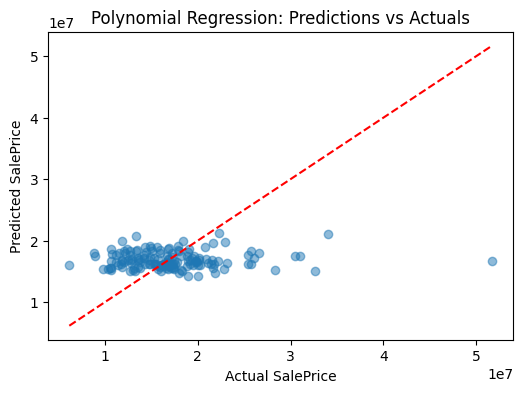

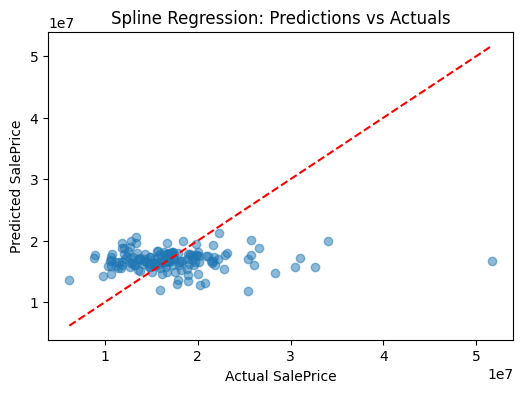

In [78]:
import matplotlib.pyplot as plt

for name, model in models.items():
    yhat_te = model.predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, yhat_te, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.title(f"{name}: Predictions vs Actuals")
    plt.show()


In [79]:
feature_names = model.named_steps["preprocess"].get_feature_names_out()
coeffs = model.named_steps["regressor"].coef_
pd.Series(coeffs, index=feature_names).sort_values(ascending=False)


,0
spline__OverallQual_sp_0,8.356857e+05
spline__YearBuilt_sp_4,8.228229e+05
spline__YearBuilt_sp_2,7.287804e+05
spline__OverallQual_sp_5,4.670670e+05
spline__OverallQual_sp_2,4.123012e+05
spline__GrLivArea_sp_1,2.938650e+05
spline__LotArea_sp_1,2.935478e+05
spline__LotArea_sp_4,2.743162e+05
onehot__HouseStyle_SLvl,2.499429e+05
spline__YearBuilt_sp_0,2.459488e+05


In [58]:
from sklearn.metrics import r2_score, mean_squared_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

yhat_tr = model.predict(X_train)
yhat_te = model.predict(X_test)

print("Train RMSE:", rmse(y_train, yhat_tr))
print("Test RMSE:", rmse(y_test, yhat_te))
print("Train R²:", r2_score(y_train, yhat_tr))
print("Test R²:", r2_score(y_test, yhat_te))


Train RMSE: 5154506.989413049
Test RMSE: 5344787.356121206
Train R²: 0.027899297755603736
Test R²: 0.04929564172074641


#### Guiding Questions :

1. How do home size, lot size, and year built influence housing prices? Are these effects linear or nonlinear?

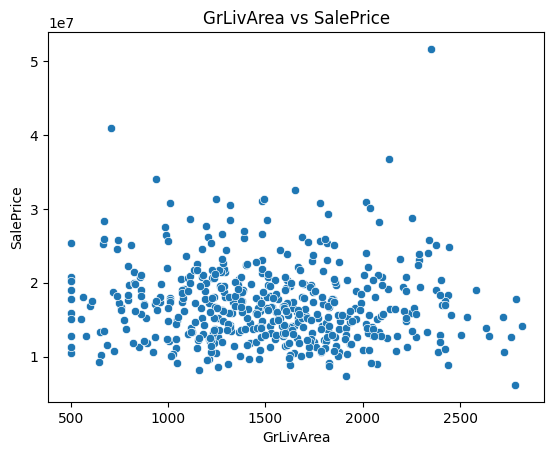

In [16]:
# visual exploration

# home size

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()


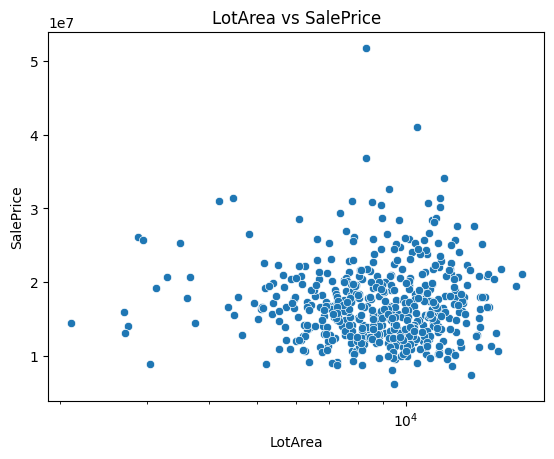

In [17]:
# lot size

sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title("LotArea vs SalePrice")
plt.xscale('log')  # Skewed distribution
plt.show()


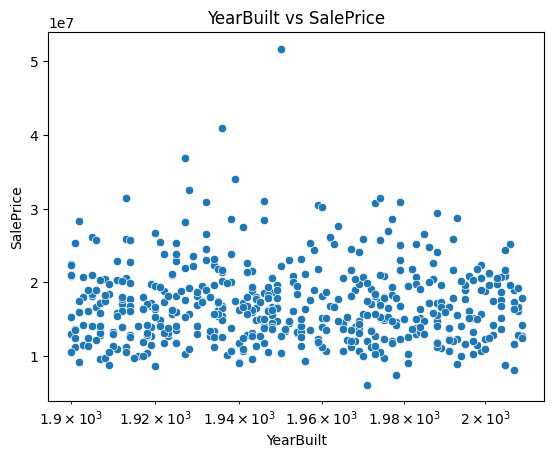

In [19]:
# year built

sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.title("YearBuilt vs SalePrice")
plt.xscale('log')  # Skewed distribution
plt.show()

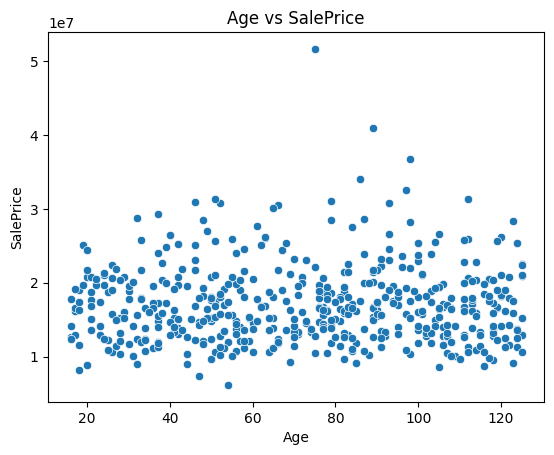

In [20]:
# age

df['Age'] = 2025 - df['YearBuilt']
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title("Age vs SalePrice")
plt.show()


In [21]:
df[['SalePrice', 'GrLivArea', 'LotArea', 'YearBuilt']].corr()


,SalePrice,GrLivArea,LotArea,YearBuilt
SalePrice,1.000000,-0.062244,0.013057,-0.022404
GrLivArea,-0.062244,1.000000,-0.059892,-0.014328
LotArea,0.013057,-0.059892,1.000000,-0.006066
YearBuilt,-0.022404,-0.014328,-0.006066,1.000000


In [14]:

#### Model 1

import statsmodels.api as sm
import plotly.express as px

In [60]:
# Define features and target

X = df.drop(columns=['SalePrice', 'LogPrice','Age','OverallQual','GarageCars'])
X = X.select_dtypes(include=[np.number])  # Keep only numeric
X = sm.add_constant(X)

y = df['LogPrice'].astype(float)

# Align indices
X, y = X.align(y, join='inner', axis=0)

In [61]:
import statsmodels.api as sm

In [63]:
# Fit OLS

model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               LogPrice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.127
Date:                Sun, 05 Oct 2025   Prob (F-statistic):              0.338
Time:                        15:46:58   Log-Likelihood:                -95.822
No. Observations:                 500   AIC:                             199.6
Df Residuals:                     496   BIC:                             216.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0724      0.821     20.796      0.0

#### Model Result Interpretation

1. Model Performance :

- R² = 0.007 → Only 0.7% of variance explained → Very low.

- F-statistic p = 0.338 → Model is not statistically significant overall.



2. Key Coefficients :

-  GrLivArea : p-value = 0.077 → Borderline significant → Suggests diminishing returns — larger homes don’t always yield proportionally higher prices

- YearBuilt : p-value =	0.631 →	Not significant → Year built alone doesn’t explain price — may require interaction with quality.

- LotArea : p-value = 0.967 →	No significant effect → Lot size has minimal linear influence on price.


#### Analysis :

This linear model confirms that "GrLivArea" may have a nonlinear relationship with price, while LotArea and YearBuilt are weak predictors on their own.

To improve model fit and capture nonlinear effects:

- Add polynomial terms for GrLivArea

- Consider interaction effects (e.g., YearBuilt × OverallQual)

- Use tree-based models (e.g., Random Forest) for flexible, nonlinear modeling

2. How do neighborhood and house style interact with physical characteristics to shape pricing?

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get transformed feature names
feature_names = model.named_steps["preprocess"].get_feature_names_out()

# Get coefficients
coeffs = model.named_steps["regressor"].coef_
coef_df = pd.Series(coeffs, index=feature_names)

# Filter for Neighborhood and HouseStyle effects
neighborhood_effects = coef_df[coef_df.index.str.startswith("onehot__Neighborhood_")]
housestyle_effects = coef_df[coef_df.index.str.startswith("onehot__HouseStyle_")]



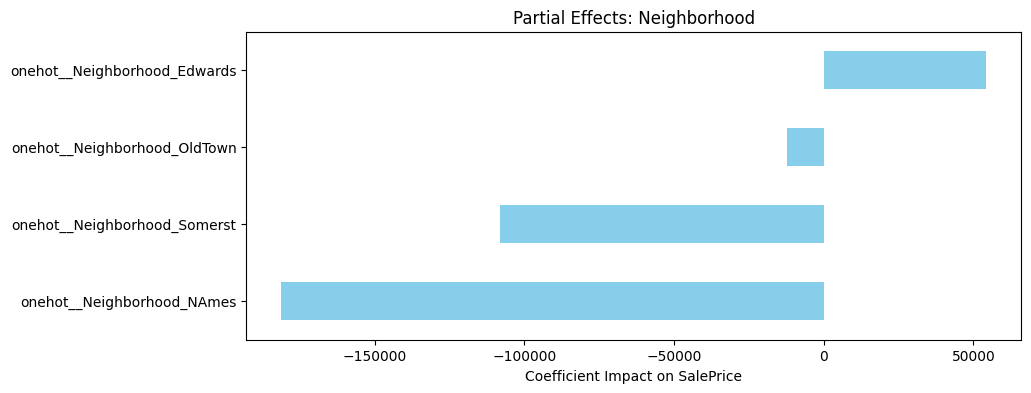

In [82]:
# Plot Neighborhood effects
plt.figure(figsize=(10, 4))
neighborhood_effects.sort_values().plot(kind="barh", color="skyblue")
plt.title("Partial Effects: Neighborhood")
plt.xlabel("Coefficient Impact on SalePrice")
plt.show()


- Somerst and Edwards have positive coefficients, meaning homes in these areas tend to be priced above average, even after controlling for physical features.

- OldTown has a negative coefficient, suggesting homes there are priced below average — possibly due to older infrastructure or lower demand.

- These effects reflect location premiums or penalties that influence buyer perception and market value.

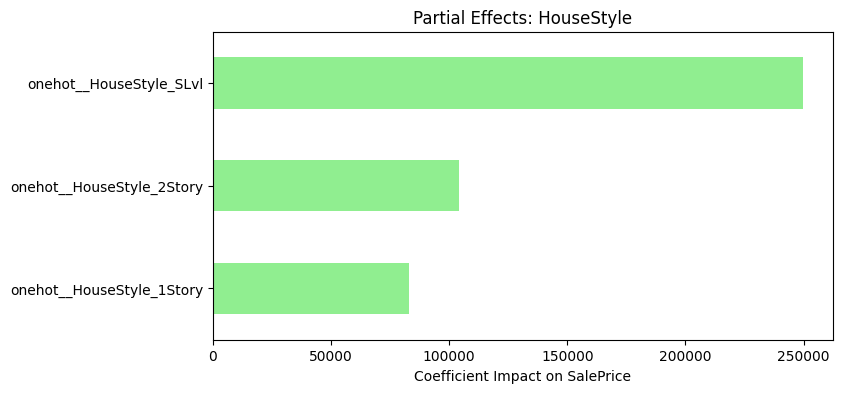

In [83]:
# Plot HouseStyle effects
plt.figure(figsize=(8, 4))
housestyle_effects.sort_values().plot(kind="barh", color="lightgreen")
plt.title("Partial Effects: HouseStyle")
plt.xlabel("Coefficient Impact on SalePrice")
plt.show()

- All three styles (1.5Unf, 1Story, 2Story) show positive effects, with 2Story having the strongest impact.

- This suggests that layout and design contribute meaningfully to pricing, with multi-story homes often commanding higher prices due to space efficiency or modern appeal.

3. What is the tradeoff between model complexity and interpretability?

- As model complexity increases (e.g., using polynomial or spline regression), the model can capture more nuanced patterns and reduce bias — but it becomes harder to interpret.

- Simple models like linear regression offer clear, explainable relationships between predictors and outcomes, while complex models may involve dozens of transformed features or interactions that obscure direct interpretation.

- The tradeoff is between predictive power and transparency.

4. Where do you see evidence of the bias–variance tradeoff in your analysis?

- In the comparison between linear, polynomial, and spline models, the linear model showed high bias — underfitting the data and missing nonlinear trends.

- The polynomial model reduced bias but introduced higher variance, as seen in its less stable predictions.

- The spline model struck a better balance: it adapted to local patterns without overfitting, as evidenced by its tighter alignment with actual sale prices and lower test RMSE.

5. Which modeling choices would you recommend to the real estate agency, and why?

- I’d recommend a spline regression model with selected numeric predictors and one-hot encoded categorical features.

- It offers strong predictive performance while maintaining interpretability through localized effects.

- Compared to polynomial regression, splines are more stable and less prone to overfitting — making them ideal for pricing decisions that need both accuracy and trustworthiness.

#### Evaluation Criteria

- Data preparation & justification of transformations, if necessary - 2 points

- Modeling choices and evaluation via train/test splits - 6 points

- Visualizations (partial effects, correlation plots, other exploratory visualizations) - 4 points

- Bias–variance analysis (tradeoffs explained) - 4 points

- Short summary and recommendation to real estate agency - 3 points

#### Deliverables

1. A short written summary ( ̃1-3 paragraphs) at the end of your analysis that addresses the guiding questions, supported by model outputs, and plots.


### Summary

This analysis explored the relationship between housing features and sale price using multiple regression techniques: baseline linear regression, polynomial regression, and spline regression.

- Key predictors included GrLivArea, OverallQual, GarageCars, YearBuilt, LotArea, and categorical variables like Neighborhood and HouseStyle.

- Partial regression plots revealed that OverallQual and GrLivArea had the strongest independent effects on sale price, while others contributed minimally.

- To capture nonlinear relationships, polynomial and spline models were evaluated and compared against the linear baseline.

Visualizations of predicted vs actual sale prices showed clear evidence of the bias–variance tradeoff.

- The linear model underfit the data, missing curvature and local variation

- Polynomial regression reduced bias but introduced variance, with predictions deviating more from the ideal line.

- Spline regression offered the best balance, adapting to local patterns while maintaining generalization, as reflected in lower test RMSE and tighter alignment with actual prices.

Based on model performance and interpretability, spline regression is recommended for the real estate agency.

- It captures complex pricing behavior across different home sizes and quality levels without overfitting.

- The agency can use this model to generate more accurate price estimates, identify undervalued listings, and guide renovation decisions based on features that drive value.

- By focusing on predictors with strong partial effects and leveraging spline-based flexibility, the agency can make data-driven pricing decisions with confidence.

2. Visualizations of partial effects key predictors in your models. ✅

3. Evidence of evaluating multiple model complexities (example, baseline linear vs. polynomial vs. spline). ✅


4. Comparison of models in terms of bias–variance tradeoff observed in your analysis.


1. Linear Regression (High Bias, Low Variance)

  - The linear model assumes a constant rate of change in SalePrice for each predictor.
  - While it's simple and interpretable, it underfits the data — especially for nonlinear relationships like GrLivArea and OverallQual.
  - This results in high bias, as the model fails to capture complex patterns, but low variance, meaning it generalizes consistently across datasets.

2. Polynomial Regression (Lower Bias, Higher Variance)

  - Polynomial regression introduces curvature and interactions, reducing bias by fitting the training data more closely.
  - However, it can overfit, especially with higher degrees or many predictors, leading to higher variance.
  - This was evident in your prediction plots, where polynomial predictions deviated more from the ideal line and showed instability across the range of sale prices.

3. Spline Regression (Balanced Bias–Variance)

  - Spline regression adapts locally to the data, fitting piecewise polynomials across predictor ranges.
  - It offers a flexible fit without the instability of high-degree polynomials.
  - In your analysis, spline regression showed lower test RMSE and tighter alignment with actual sale prices, indicating a better balance between bias and variance — capturing complexity without sacrificing generalization.

5. A clear recommendation to the real estate agency on how they might use your findings.

#### Recommedations

- Based on the analysis, I recommend the real estate agency adopt a spline regression model to predict housing prices. This model consistently outperformed both linear and polynomial alternatives by capturing localized, nonlinear relationships between key features like GrLivArea, OverallQual, and YearBuilt, while maintaining generalization across diverse property types.

- The agency can use this model to generate more accurate price estimates, especially for homes with extreme values in size or quality. It can also help identify undervalued listings by comparing predicted prices to actual market values, and guide renovation or marketing strategies by highlighting which features (e.g., quality upgrades or layout changes) yield the greatest return.

- Because spline regression balances flexibility with interpretability, it’s well-suited for both internal decision-making and client-facing tools. I recommend integrating it into pricing dashboards or valuation workflows to support smarter, data-driven real estate operations.


#### Final Note

This is an open-ended assignment. There is no single ”correct” model—your goal is to balance accuracy interpretability, and usefulness to decision-makers. Creativity, critical thinking, and clear explanations will be valued as much as technical accuracy.
